## Exercise

Use forward Euler to evaluate the ODE:
$$\begin{align*}
    y'(t) &= \cos(y t)\\
    y(0) &= 0
\end{align*}$$

for $t$ between 0 and 5. Use $N = 50$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# define time horizon and number of intervals
T = 5
N = 50
dt = T/N

t = np.linspace(0,T,N+1)
y0 = 0

# construct a list to contain y values at each time step, append initial condition
y = []
y.append(y0)

for i in range(1,N + 1):
    y.append(y[i - 1] + dt * np.cos(y[i - 1] * t[i - 1]))

Text(0,0.5,'y(t)')

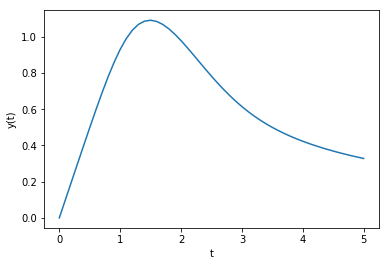

In [6]:
plt.plot(t,y)
plt.xlabel("t")
plt.ylabel("y(t)")

## Exercise

Use forward Euler to evaulate the following system of ODEs:
$$\begin{align*}
    x'(t) &= x(1.5 - x - 0.5y)\\
    y'(t) &= y(2 - y -0.75x)\\
    x(0) &= 1,\qquad y(0)=1
\end{align*}$$
for $t$ between 0 and 30, and $N=3000$.

In [7]:
# define time horizon and number of intervals
T = 30
N = 3000
dt = T/N

t = np.linspace(0,T,N+1)
x0 = 1
y0 = 1

# constructs a list to contain x and y values at each time step, append initial condition
x = []
y = []
x.append(x0)
y.append(y0)

for i in range(1,N+1):
    x.append(x[i-1] + dt*(x[i-1] * (1.5 - x[i - 1] - 0.5 * y[i-1])))
    y.append(y[i-1] + dt*(y[i-1] * (2 - y[i-1] - 0.75*x[i-1])))

Text(0.5,0,'time')

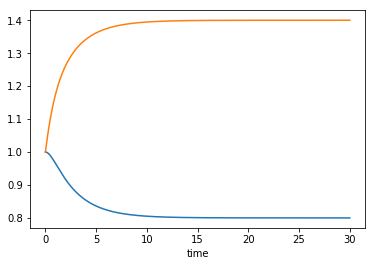

In [8]:
plt.plot(t,x)
plt.plot(t,y)
plt.xlabel("time")

## Exercise

The Lorenz equations are given by:
$$\begin{align*}
x'(t) &= \sigma (y - x)\\
y'(t) &= x(\rho - z) - y\\
z'(t) &= xy - \beta z
\end{align*}$$
where $\sigma$, $\rho$ and $\beta$ are constants. 

Using the code above, solve the Lorenz equations from $t=0$ to $t=100$ with $N=10000$, starting from $x_0=0$, $y_0=1$ and $z_0=1$. Take $\sigma=10$, $\beta=8/3$ and $\rho=28$.

Do a phase plot of $x$ vs $z$.

In [10]:
def forward_euler_step(f, y, t, dt):

    return y + dt*f(y,t)


In [13]:
def forward_euler(f, y0, T, N):
    
    # split time into intervals
    t = np.linspace(0,T,N+1)
    dt = T/N
    
    y = []
    y.append(y0)
    
    for i in range(1,N+1):

        y.append(forward_euler_step(f, y[i-1], t[i-1], dt))
        
    return (t,y)

In [14]:
def lorenz(y, t, sigma=10, beta=8/3, rho=28):
    return np.array([
        sigma * (y[1] - y[0]), 
        y[0] * (rho - y[2]) - y[1], 
        y[0] * y[1] - beta * y[2]
    ])

In [21]:
t, y = forward_euler(lorenz, [0, 1, 1], 100, 10000)

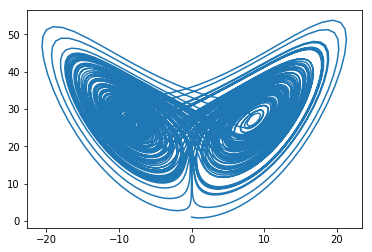

In [24]:
y = np.array(y)
plt.plot(y[:, 0], y[:,2])